In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def chua(xyz: np.ndarray, a = 8.4, b = 12, m0 = -0.12, m1 = -1.15):
    x,y,z = xyz
    f = lambda x: m1*x + 0.5*(m0 - m1)*(np.abs(x + 1) - np.abs(x - 1))
    dx = a * (y - f(x))
    dy = x - y + z
    dz = -b * y
    return np.array([dx, dy, dz])

#### Numerical Settings ####
IC = np.array([1,1,1])
t_start, t_end, h = 0, 100, 0.001
num_steps = int((t_end - t_start) / h)
t = np.linspace(t_start, t_end, num_steps)

trajectory_data = np.zeros((num_steps, 3))
trajectory_data[0,:] = IC

# Using RK4 for the first 4 points to collect data to use for the explicit AB method
for i in range(3):
    k1 = h * chua(trajectory_data[i, :])
    k2 = h * chua(trajectory_data[i, :] + 0.5 * k1)
    k3 = h * chua(trajectory_data[i, :] + 0.5 * k2)
    k4 = h * chua(trajectory_data[i, :] + h * k3)
    trajectory_data[i + 1, :] = trajectory_data[i, :] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# for more accuracy we can deploy and implement the predictor-corrector method which uses a guessing method to predict x_n+1 and then uses this value
# in the implicit equation

# Predictor-Corrector for the remaining points
for i in range(3, num_steps - 1):
    # Predictor (AB4) to predict the next step, x_pred := trajector_data[i+1]
    x_pred = trajectory_data[i, :] + (h / 24) * (55 * chua(trajectory_data[i, :]) 
                    - 59 * chua(trajectory_data[i - 1, :]) + 37 * chua(trajectory_data[i - 2, :]) 
                    - 9 * chua(trajectory_data[i - 3, :]))

    # Corrector (AM3) by taking the prediction and putting into the "implicit" method 
    # when its really explicit because we arent solving anything explicitly
    trajectory_data[i+1,:] = trajectory_data[i,:] + (h / 24) * (9 * chua(x_pred) + 19*chua(trajectory_data[i,:]) 
                            - 5*chua(trajectory_data[i-1,:]) + chua(trajectory_data[i-2,:]))


/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_56981/3173110572.py:37: RuntimeWarning: overflow encountered in multiply
  - 59 * chua(trajectory_data[i - 1, :]) + 37 * chua(trajectory_data[i - 2, :])
/var/folders/xh/4xpwy9dj7glg3lpzyn0wwqgw0000gn/T/ipykernel_56981/3173110572.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  f = lambda x: m1*x + 0.5*(m0 - m1)*(np.abs(x + 1) - np.abs(x - 1))


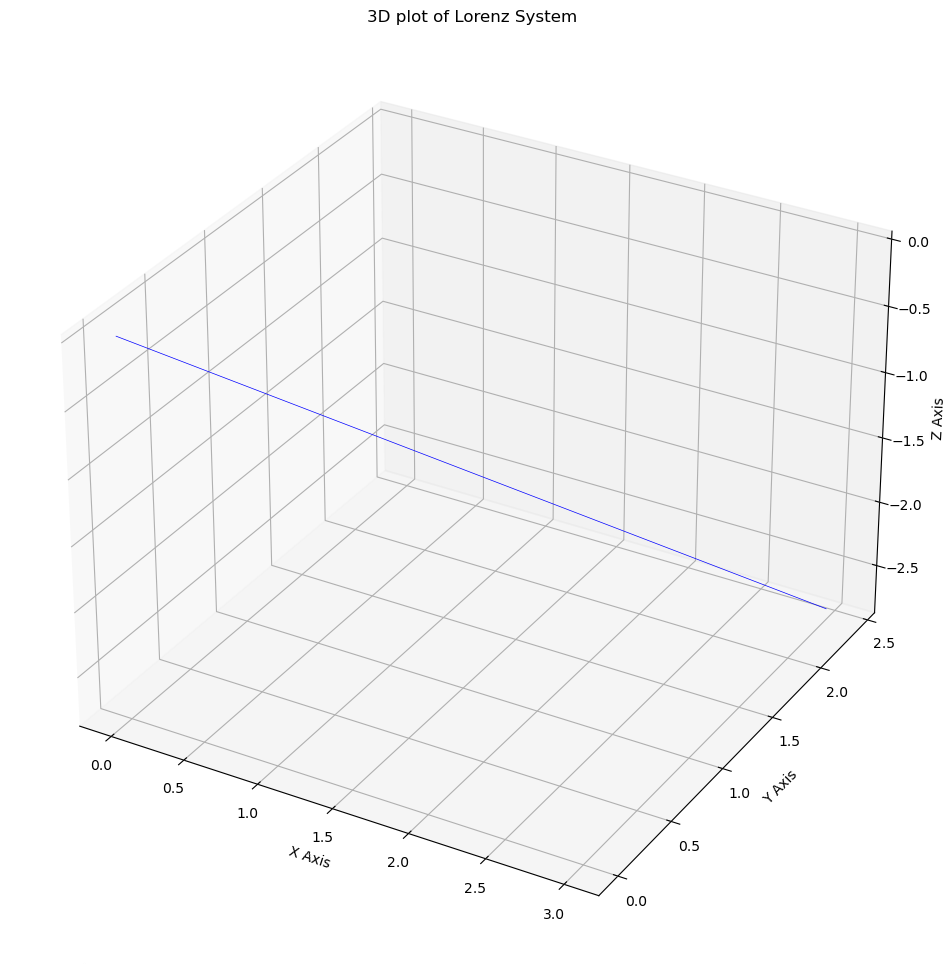

In [29]:
### Plotting the Chua Attractor
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory_data[:, 0], trajectory_data[:, 1], trajectory_data[:, 2], lw=0.5, color="blue")
ax.set_title('3D plot of Lorenz System')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [ ]:
# Function to create library 
def create_library(u: np.ndarray, polynomial_order: int,
                   use_trig: bool) -> np.ndarray:
    """Creates a matrix containing a library of candidate functions.

    For example, if our u depends on x, y, and z, and we specify
    polynomial_order=2 and use_trig=false, our terms would be:
    1, x, y, z, x^2, xy, xz, y^2, yz, z^2.
    """
    (m, n) = u.shape
    theta = np.ones((m, 1))

    # Polynomials of order 1.
    theta = np.hstack((theta, u))

    # Polynomials of order 2.
    if polynomial_order >= 2:
        for i in range(n):
            for j in range(i, n):
                theta = np.hstack((theta, u[:, i:i + 1] * u[:, j:j + 1]))

    # Polynomials of order 3.
    if polynomial_order >= 3:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    theta = np.hstack(
                        (theta, u[:, i:i + 1] * u[:, j:j + 1] * u[:, k:k + 1]))

    # Polynomials of order 4.
    if polynomial_order >= 4:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        theta = np.hstack(
                            (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                             u[:, k:k + 1] * u[:, l:l + 1]))

    # Polynomials of order 5.
    if polynomial_order >= 5:
        for i in range(n):
            for j in range(i, n):
                for k in range(j, n):
                    for l in range(k, n):
                        for m in range(l, n):
                            theta = np.hstack(
                                (theta, u[:, i:i + 1] * u[:, j:j + 1] *
                                 u[:, k:k + 1] * u[:, l:l + 1] * u[:, m:m + 1]))

    if use_trig:
        for i in range(1, 11):
            theta = np.hstack((theta, np.sin(i * u), np.cos(i * u)))

    return theta


# Now, let's generate the Theta matrix with basis functions up to order 5, without trig functions
Theta = create_library(trajectory_data, 5, False)
Theta = Theta[:-1,:]
print(Theta.shape)
